
# 正則化

In [ ]:
・実装(正則化なしの多項式回帰)
    ⒈データの準備
    ⒉データの観察
    ⒊データの変数変換
    ⒋データの分割
    ⒌データの学習
    ⒍モデルの確認・評価

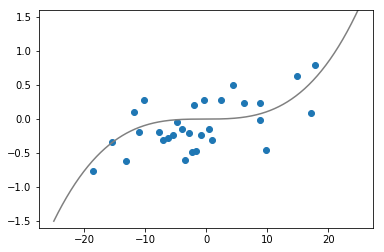

train: 0.7518314053051454
test: -1.2833912536546421


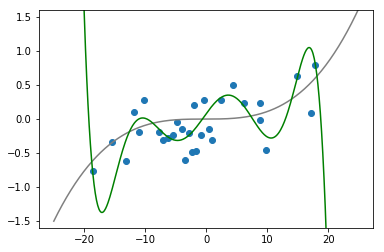

In [8]:
# 必要なライブラリを読み込み
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# 適当なデータセットを生成
# 中のコードは気にしなくていいので､今回はグラフだけ眺めてください

# 適当な三次関数を出力する関数を定義
def cubic(X):
    y = 0.0001 * (X**3 + X**2 + X + 1)
    return y

# サンプルデータの生成
np.random.seed(3)                         # 乱数生成器の状態を指定
X = np.random.normal(0, 10, 30)           # 正規分布に従って30個のデータ点を生成
y = cubic(X)                              # 対応するyを三次関数で指定
y += np.random.normal(0, 0.25, len(y))    # 正規分布に従うノイズを加える
X = X.reshape(-1, 1)                      # sklearnで扱えるように､一列のベクトルに変換

# 三次関数をプロットする用のデータを生成
x = np.arange(-25, 25, 0.1)          # -25~+25の範囲に､0.1刻みでデータ点を取る
y_plot = cubic(x)                    # 対応するyを三次関数で指定
x = x.reshape(-1, 1)            # sklearnで扱えるように､一行のベクトルに変換

# グラフを描画
plt.scatter(X, y)                         # データ点をプロット
plt.plot(x, y_plot, color='gray')    # もととなる三次関数を描画
plt.ylim([-1.6, 1.6])                     # 縦の表示範囲を指定
plt.show()                                # グラフを表示

#変数変換
from sklearn.preprocessing import PolynomialFeatures 
pol = PolynomialFeatures(degree=7)                   
X_pol = pol.fit_transform(X)  
x_pol = pol.fit_transform(x) 

#データの分割
from sklearn.model_selection import train_test_split
X_pol_train,X_pol_test,y_train,y_test=train_test_split(X_pol,y,
                                    test_size=0.3,random_state=0)

#データの学習
from sklearn.linear_model import LinearRegression
lr = LinearRegression()     
lr.fit(X_pol_train, y_train)                                     

#精度(普通の決定係数)を出力
print("train:",lr.score(X_pol_train,y_train))
print("test:",lr.score(X_pol_test,y_test))

# グラフを描画
y_plot_pol = lr.predict(x_pol)    
plt.scatter(X, y)                                    
plt.plot(x, y_plot, color='gray')              
plt.plot(x, y_plot_pol, color='green')          
plt.ylim([-1.6, 1.6])                                
plt.show()   

train: 0.5837224648257896
test: -1.3581230474682928


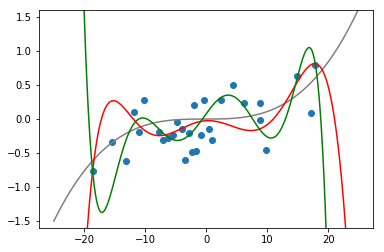

normal: 0.12408533840432441
ridge: 0.008384712623198206


In [9]:
#Ridge

#変数変換
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=7)
X_pol=pol.fit_transform(X)
x_pol=pol.fit_transform(x)
#(データの分割)
from sklearn.model_selection import train_test_split
X_pol_train,X_pol_test,y_train,y_test=train_test_split(X_pol,y,
                                    test_size=0.3,random_state=0)
#Ridge回帰を実行
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=1000)
model_ridge.fit(X_pol_train,y_train)
#精度を出力
print("train:",model_ridge.score(X_pol_train,y_train))
print("test:",model_ridge.score(X_pol_test,y_test))
# グラフを描画
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(x, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(x, model_ridge.predict(x_pol), color='red') # Ridge回帰によるモデルを描画
plt.plot(x, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()                                                     # グラフを描画
#L2ノルムが縮小していることを確認
from numpy import linalg as LA
print("normal:",LA.norm(lr.coef_))
print("ridge:",LA.norm(model_ridge.coef_))

train: 0.4857250853797791
test: -0.16271618798929022


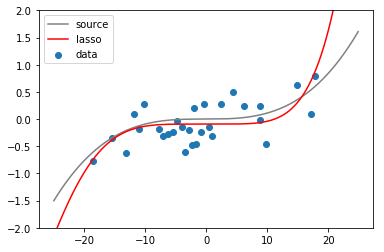

normal: 0.1309718099411861
lasso: 4.7449801719398397e-07


In [10]:
#LASSO

#変数変換
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=7)
X_pol=pol.fit_transform(X)
x_pol=pol.fit_transform(x)
#(データの分割)
from sklearn.model_selection import train_test_split
X_pol_train,X_pol_test,y_train,y_test=train_test_split(X_pol,y,
                                    test_size=0.3,random_state=0)
#LASSO回帰を実行
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=1000)
model_lasso.fit(X_pol_train,y_train)
#精度(通常の決定係数)を出力
print("train:",model_lasso.score(X_pol_train,y_train))
print("test:",model_lasso.score(X_pol_test,y_test))
#プロット
plt.scatter(X,y,label="data")
plt.plot(x,y_plot,color="gray",label="source")
plt.plot(x,model_lasso.predict(x_pol),color="red",label="lasso")
plt.legend()
plt.ylim([-2,2])
plt.show()
#L1ノルムが縮小していることを確認
from numpy import linalg as LA
print("normal:",LA.norm(lr.coef_,ord=1))
print("lasso:",LA.norm(model_lasso.coef_,ord=1))

train: 0.48605559453912817
test: -0.1627470981134449


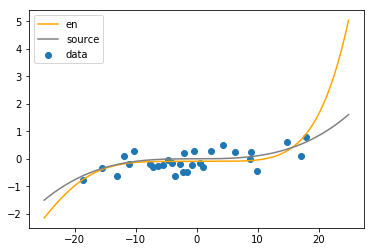

In [11]:
#ElasticNet

#変数変換
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=7)
X_pol=pol.fit_transform(X)
x_pol=pol.fit_transform(x)
#データの分割
from sklearn.model_selection import train_test_split
X_pol_train,X_pol_test,y_train,y_test=train_test_split(X_pol,y,
                                    test_size=0.3,random_state=0)
#ElasticNetの実行
from sklearn.linear_model import ElasticNet
model_en=ElasticNet(alpha=1000,l1_ratio=0.9)
model_en.fit(X_pol_train,y_train)
#精度(通常の決定係数)の出力
print("train:",model_en.score(X_pol_train,y_train))
print("test:",model_en.score(X_pol_test,y_test))
#プロット
plt.scatter(X,y,label="data")
plt.plot(x,model_lasso.predict(x_pol),color="orange",label="en")
plt.plot(x,y_plot,color="gray",label="source")
plt.legend()
plt.ylim()
plt.show()